# 1b Centered Derivatives

We can approximate partial spatial derivatives with finite differences, and consider the function values $f_{i,jk}$ at discrete points $(i\Delta x,j\Delta y,k\Delta z)$ in three dimension to be variables whose time evolution is governed by ordinary differential equations (ODEs) in time.  Using for example a 2nd order finite difference to approximate the spatial derivatives, and looking at a case with constant velocity ${\bf v}$ and a profile $f(r,t)$ that is time independent in the moving coordinate frame ($f({\bf r}_0-{\bf v}t,t) = f({\bf r}_0,0)$), we will need to compute spatial derivatives, with formulae such as

\begin{equation}\tag{1}
\left(\frac{\partial f}{\partial x}\right)_{i,j,k} = \frac{1}{2\Delta x} \left(f_{i+1,j,k}-f_{i-1,j,k}\right)
\end{equation}

To use Python to play around with this, we need a function that returns the spatial derivative in each of the three directions.  To avoid having to specify boundary conditions we assumme that the domain is periodic.  Then we can use the `numpy` function `roll` to quickly and efficiently compute the finite differences.

While we could put import and the derivative function together, it is good practice to have a seperate cell at the top that imports the neccessary modules. Further down, we will need to do plotting. Therefore, we also import the `matplotlib.pyplot` module. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def deriv(f,ds,axis=0):
    """ 
    Compute derivative in the axis-direction, given f[i,j,k] 
    and ds = mesh size in the axis-direction
    """
    return (np.roll(f,-1,axis)-np.roll(f,+1,axis))/(2.0*ds)

`numpy.roll` (or `np.roll`, because we import `numpy` as `np`) does a "circular shift" (shifting with periodic wrapping). To see documentation for it, do

In [23]:
help(np.roll)

Help on function roll in module numpy:

roll(a, shift, axis=None)
    Roll array elements along a given axis.
    
    Elements that roll beyond the last position are re-introduced at
    the first.
    
    Parameters
    ----------
    a : array_like
        Input array.
    shift : int or tuple of ints
        The number of places by which elements are shifted.  If a tuple,
        then `axis` must be a tuple of the same size, and each of the
        given axes is shifted by the corresponding number.  If an int
        while `axis` is a tuple of ints, then the same value is used for
        all given axes.
    axis : int or tuple of ints, optional
        Axis or axes along which elements are shifted.  By default, the
        array is flattened before shifting, after which the original
        shape is restored.
    
    Returns
    -------
    res : ndarray
        Output array, with the same shape as `a`.
    
    See Also
    --------
    rollaxis : Roll the specified axis backwa

To try the partial derivative on a sin(x) function we create a 3D array with a `sin(x)` function along the x-axis.

Notice that we put a `;` on the last line, this will prevent Jupyter in automatically trying to print the return value from the last function, which in this case will just be some info about what and where things have been plotted.

If you get annoyed by an output window with scroll bars then right-click anywhere on the notebook window and select _Disable scrolling for outputs_

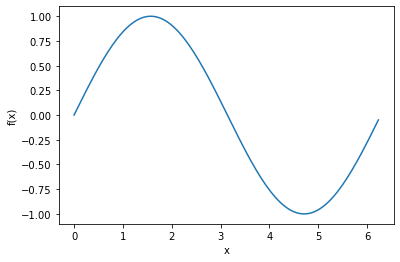

In [24]:
def sinx_3d(m):
    f=np.zeros(m)
    x=np.zeros(m[0])
    ds=2.0*np.pi/np.array(m)
    for i in range(m[0]):
        x[i]=i*ds[0]
        f[i,:,:]=np.sin(x[i])
    return f,x,ds
n=128
m=(n,n,n)
f,x,ds=sinx_3d(m)
plt.plot(x,f[:,0,0])
plt.xlabel('x')
plt.ylabel('f(x)');

Check the derivative, which should be $cos(x)$

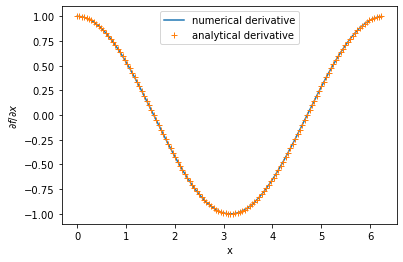

In [25]:
dfdx=deriv(f,ds[0],0)
plt.plot(x,dfdx[:,0,0],label='numerical derivative')
plt.xlabel('x')
plt.ylabel('$\partial f/\partial x$')
plt.plot(x,np.cos(x),'+',label='analytical derivative')
plt.legend();

The `deriv` function also works for 1-D arrays:

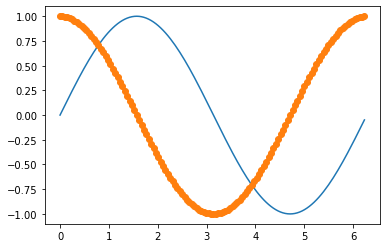

In [26]:
f=np.sin(x)
dx=ds[0]
dfdx=deriv(f,dx)
plt.plot(x,f)
plt.plot(x,dfdx, 'o-');

Let's check the size of the error:

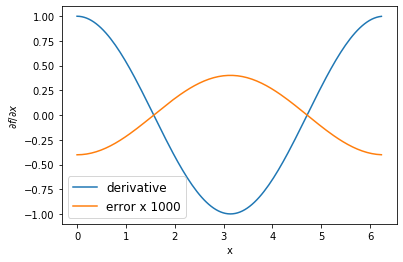

In [27]:
dfdx=deriv(f,dx)
plt.plot(x,dfdx,label='derivative')
plt.xlabel('x')
plt.ylabel('$\partial f/\partial x$')
plt.plot(x,1e3*(dfdx-np.cos(x)),label='error x 1000')
plt.legend(fontsize=12);

Evidently, the error in the finite difference derivative is a very small amount (less than one part in a thousand), with the given resolution (128 points in 2$\pi$).   

With lower resolution, the error grows, of course.  How do you think it scales with the resolution?  You can check your answer by modifying the code above (or copying the relevant cells below here):

In [28]:
for n in (8,16,32,64,128,256):
    dx=2.*np.pi/n
    x=dx*np.arange(n)
    f=np.sin(x)
    d=max(abs(np.cos(x)-deriv(f,dx)))
    print('n: {:3d} max  error: {:.6f}'.format(n,d))

n:   8 max  error: 0.099684
n:  16 max  error: 0.025505
n:  32 max  error: 0.006413
n:  64 max  error: 0.001606
n: 128 max  error: 0.000402
n: 256 max  error: 0.000100


We can compute the error for 2nd order derivatives, and make a loglog plot:

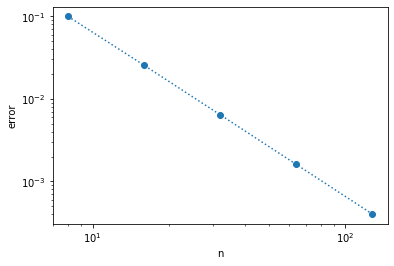

In [29]:
nn=[]; d2=[]
for n in (8,16,32,64,128):
    dx=2.*np.pi/n
    x=dx*np.arange(n)
    f=np.sin(x)
    nn.append(n)
    d=max(abs(np.cos(x)-deriv(f,dx)))
    d2.append(d)
plt.loglog(nn,d2,'o',linestyle=':')
plt.xlabel('n'); plt.ylabel('error');

## Task: Compare with 4th order centered derivative

The formula for a 4th order centered derivative is:

\begin{equation}\tag{2}
\left(\frac{\partial f}{\partial x}\right)_{i,j,k} = 
\frac{1}{12 \Delta x} 
\left[
8(f_{i+1,j,k}-f_{i-1,j,k})
-(f_{i+2,j,k}-f_{i-2,j,k})
\right]
\end{equation}

Compute the corresponding errors for the 4th order derivatives, and plot them as filled squares (Python symbol `'s'`), together with the 2nd order errors as filled circles (symbol `'o'`).

In [30]:
def deriv4(f,ds,axis=0):
    """ 
    Compute 4th order linear derivative in the axis-direction, given f[i,j,k] 
    and ds = mesh size in the axis-direction
    """
    return (8*(np.roll(f,-1,axis)-np.roll(f,+1,axis))-(np.roll(f,-2,axis)-np.roll(f,+2,axis)))/(12.0*ds)

In [31]:
for n in (8,16,32,64,128,256):
    dx=2.*np.pi/n
    x=dx*np.arange(n)
    f=np.sin(x)
    d=max(abs(np.cos(x)-deriv4(f,dx)))
    print('n: {:3d} max  error: {:.10f}'.format(n,d))

n:   8 max  error: 0.0117848359
n:  16 max  error: 0.0007782942
n:  32 max  error: 0.0000493179
n:  64 max  error: 0.0000030930
n: 128 max  error: 0.0000001935
n: 256 max  error: 0.0000000121


In [32]:
# Error is less than a part in a million!
0.0000001935*1e6

0.1935

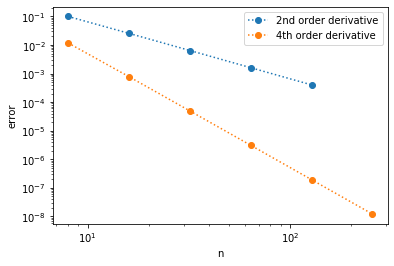

In [33]:
nn4,d4=[], []
for n in (8,16,32,64,128, 256):
    dx=2.*np.pi/n
    x=dx*np.arange(n)
    f=np.sin(x)
    nn4.append(n)
    d=max(abs(np.cos(x)-deriv4(f,dx)))
    d4.append(d)
plt.loglog(nn,d2,'o',linestyle=':', label='2nd order derivative')
plt.loglog(nn4,d4,'o',linestyle=':', label='4th order derivative')
plt.xlabel('n'); plt.ylabel('error');
plt.legend();

In [46]:
from scipy.optimize import curve_fit
def fit(x,a,b):
    x=np.array(x)
    return b/x**(a)

In [47]:
val4, cov4=curve_fit(fit, nn4, d4)

In [49]:
fit(128, val4[0], val4[1])

2.2386781649788573e-07

In [50]:
nn4

[8, 16, 32, 64, 128, 256]

In [51]:
val2, cov2=curve_fit(fit, nn, d2)

In [52]:
val2[0]

1.9698021526558198

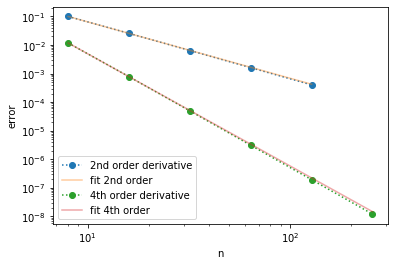

In [53]:
plt.loglog(nn,d2,'o',linestyle=':', label='2nd order derivative')
plt.loglog(nn, fit(nn, val2[0], val2[1]), alpha=0.4, label='fit 2nd order')
plt.loglog(nn4,d4,'o',linestyle=':', label='4th order derivative')
#note that I set the constant term to 
plt.loglog(nn4, fit(nn4, val4[0], val4[1]), alpha=0.4, label='fit 4th order')
plt.xlabel('n'); plt.ylabel('error');
plt.legend()

### __Absalon turn in:__

   1. Replace the ellipses (...) in the following sentence with the 4th order result, and add the answer to the notebook
   2. Upload the notebook

_So, while the error at `n=128` is less than a part in a thousand for 2nd order, it's less than a part in a million with 4th order! The error scales as n^-4 for 4th order_

However, as one can note, the error doesn't quite go down as quickly as one would hope. Essentially , O(n^2) renders something more like O(n^1.95), while O(n^4) renders something more like O(n^3.91), since our data doesn't ever quite do what we would like.